In [1]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

In [3]:
%autoreload 2
from guitarsounds import Sound, Signal
import guitarsounds as guit

In [4]:
import librosa
import librosa.display
from soundfile import write
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal as sig
from noisereduce import reduce_noise

# Combining Sounds/Envelops to increase accuracy

## Approach 1.  average the envelops from similar signals

In [5]:
# Data to combine : 
files1 = ['2-' + str(i) + '.wav' for i in range(1, 10)]
guit.SP.change('min_window', 300)

sounds_1 = [Sound('soundfiles/test_leste/' + file, SoundParams=guit.SP) for file in files1]

for s1 in sounds_1:
    s1.condition(verbose=False)

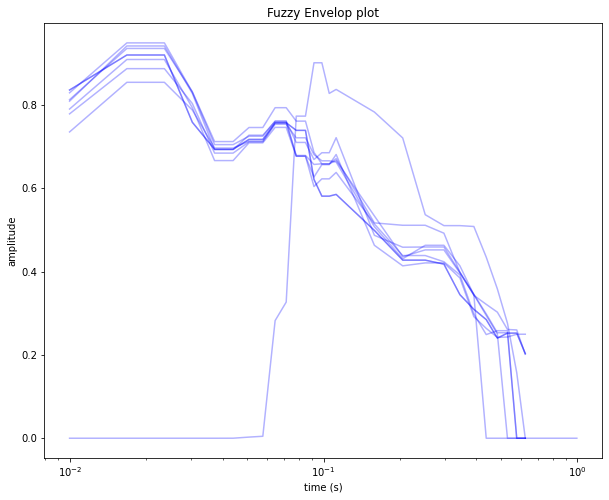

In [6]:
# Fuzzy Envelop Plot
    
plt.figure(figsize=(10,8))
for s1 in sounds_1:
    s1.signal.normalise().plot(kind='log envelop', alpha=0.3, color='b')

plt.xscale('log')
plt.title('Fuzzy Envelop plot')
plt.show()

## Average the envelops with a filter to detect outliers

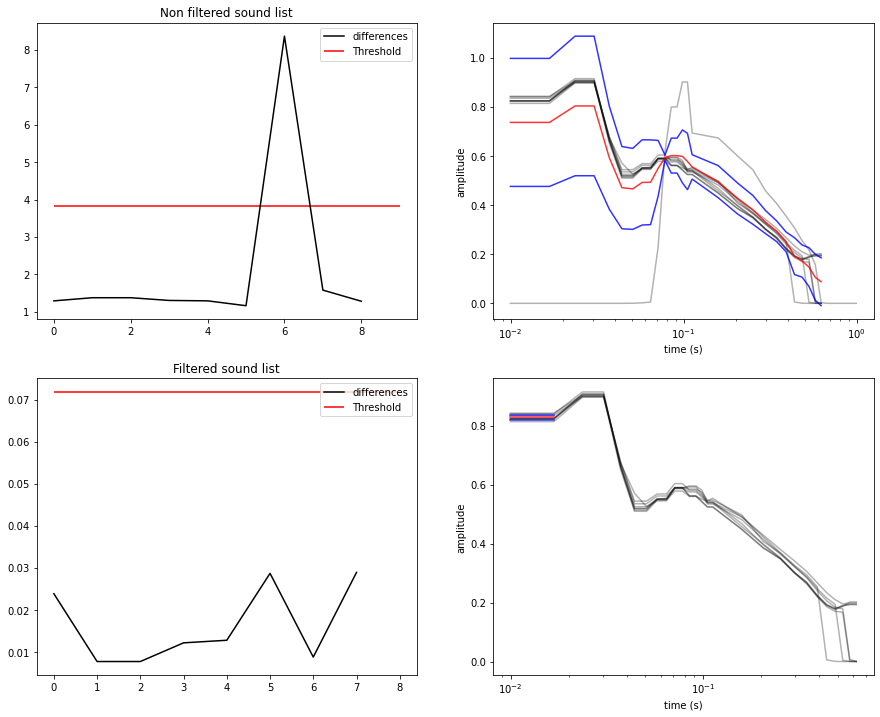

In [16]:
# Create the average envelop
sounds = np.array(sounds_1)

sample_number = np.min([len(s1.signal.log_envelop()[0]) for s1 in sounds])
log_envelops = np.stack([s1.mid.normalise().log_envelop()[0][:sample_number] for s1 in sounds])

average_log_envelop = np.mean(log_envelops, axis=0)
std = np.std(log_envelops, axis=0)

means = np.tile(average_log_envelop,(len(sounds),1))

diffs = np.abs(means - log_envelops)
diffs = np.sum(diffs, axis=1)
diff = np.mean(diffs)

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.plot(range(len(diffs)), diffs, color='k', label='differences')
plt.hlines(diff+6*max(std), 0, len(diffs), color='r', label='Threshold')
plt.title('Non filtered sound list')
plt.legend()

plt.subplot(2,2,2)
for s1 in sounds:
    s1.mid.normalise().plot(kind='log envelop', alpha=0.3, color='k')
plt.plot(s1.signal.log_envelop()[1][:sample_number], average_log_envelop, alpha=0.8, c='r')
plt.plot(s1.signal.log_envelop()[1][:sample_number] , average_log_envelop + std, alpha=0.8, c='b')
plt.plot(s1.signal.log_envelop()[1][:sample_number] , average_log_envelop - std, alpha=0.8, c='b')
plt.xscale('log')

sounds = sounds[diffs < diff]

sample_number = np.min([len(s1.signal.log_envelop()) for s1 in sounds])
log_envelops = np.stack([s1.mid.normalise().log_envelop()[0][:sample_number] for s1 in sounds])

average_log_envelop = np.mean(log_envelops, axis=0)
std = np.std(log_envelops, axis=0)

means = np.tile(average_log_envelop,(len(sounds),1))

diffs = np.abs(means - log_envelops)
diffs = np.sum(diffs, axis=1)
diff = np.mean(diffs)

plt.subplot(2,2,3)
plt.plot(range(len(diffs)), diffs, color='k', label='differences')
plt.hlines(diff+6*max(std), 0, len(diffs), color='r', label='Threshold')
plt.title('Filtered sound list')
plt.legend()

plt.subplot(2,2,4)
for s1 in sounds:
    s1.mid.normalise().plot(kind='log envelop', alpha=0.3, color='k')
plt.plot(s1.signal.log_envelop()[1][:sample_number], average_log_envelop, alpha=0.8, c='r')
plt.plot(s1.signal.log_envelop()[1][:sample_number] , average_log_envelop + std, alpha=0.8, c='b')
plt.plot(s1.signal.log_envelop()[1][:sample_number] , average_log_envelop - std, alpha=0.8, c='b')
plt.xscale('log')
plt.show()

## Implemented function

Number of rejected sounds : 1
Number of sounds included : 8
Maximum normalisation factor : 6.0x
Minimum normalisation factor : 4.0x
Number of rejected sounds : 1
Number of sounds included : 8
Maximum normalisation factor : 6.0x
Minimum normalisation factor : 4.0x
Number of rejected sounds : 1
Number of sounds included : 8
Maximum normalisation factor : 6.0x
Minimum normalisation factor : 4.0x


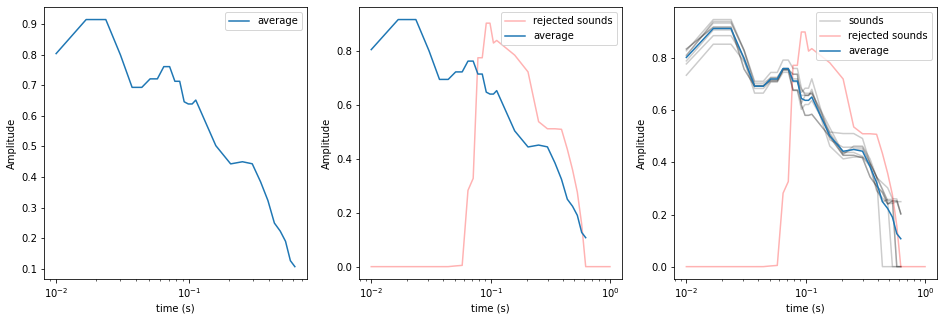

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
guit.combine_envelop(*sounds_1, show_sounds=False, show_rejects=False)
plt.subplot(1,3,2)
guit.combine_envelop(*sounds_1, show_sounds=False, show_rejects=True)
plt.subplot(1,3,3)
guit.combine_envelop(*sounds_1, show_sounds=True, show_rejects=True)

## Comparing two sounds

Number of rejected sounds : 5
Number of sounds included : 4
Maximum normalisation factor : 3.0x
Minimum normalisation factor : 3.0x
Number of rejected sounds : 1
Number of sounds included : 7
Maximum normalisation factor : 6.0x
Minimum normalisation factor : 4.0x


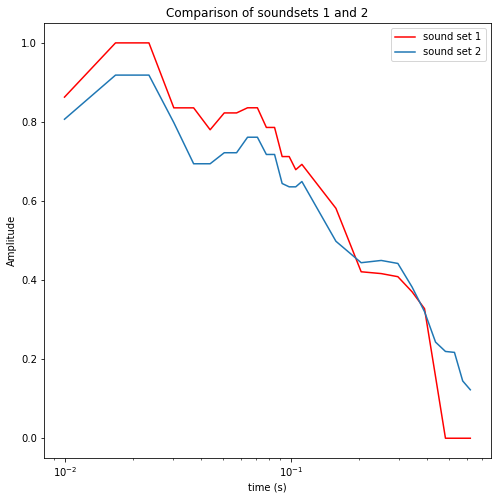

In [22]:
# Data to combine : 
files1 = ['1-' + str(i) + '.wav' for i in range(1, 10)]
files2 = ['2-' + str(i) + '.wav' for i in range(1, 9)]
guit.SP.change('min_window', 300)

sounds_1 = [Sound('soundfiles/test_leste/' + file, SoundParams=guit.SP) for file in files1]
sounds_2 = [Sound('soundfiles/test_leste/' + file, SoundParams=guit.SP) for file in files2]

for s1 in sounds_1:
    s1.condition(verbose=False)
for s2 in sounds_2:
    s2.condition(verbose=False)
    
plt.figure(figsize=(8,8))
plt.title('Comparison of soundsets 1 and 2')
guit.combine_envelop(*sounds_1, show_sounds=False, show_rejects=False, kind='signal', color='r', label='sound set 1')
guit.combine_envelop(*sounds_2, show_sounds=False, show_rejects=False, kind='signal', label='sound set 2')